# Data Preperation

In [1]:
import numpy as np
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt
import seaborn as sns

**Read the labels csv file which contains breed name for each file name of the dog images** 

In [2]:
full_labels = pd.read_csv("data/full_labels.csv")

In [3]:
full_labels.head(5)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [4]:
total_images = len(full_labels)
print(total_images)

10222


**So there are 10,222 images**  
**It would be important to see how many images we have per breed, before dividing into train and test sets**

In [5]:
breeds_df = full_labels.groupby(by="breed").count().sort_values(by=["id"], ascending=False)
breeds_df.columns = ['num_of_images']

In [7]:
print("Total number of breeds: {}".format(len(breeds_df)))
print("Breed {} has maximum num of images which is equal to {}".format(breeds_df.iloc[0].name,breeds_df.num_of_images.values.max()))
print("Breed {} has least num of images which is equal to {}".format(breeds_df.iloc[-1].name,breeds_df.num_of_images.values.min()))

Total number of breeds: 120
Breed scottish_deerhound has maximum num of images which is equal to 126
Breed eskimo_dog has least num of images which is equal to 66


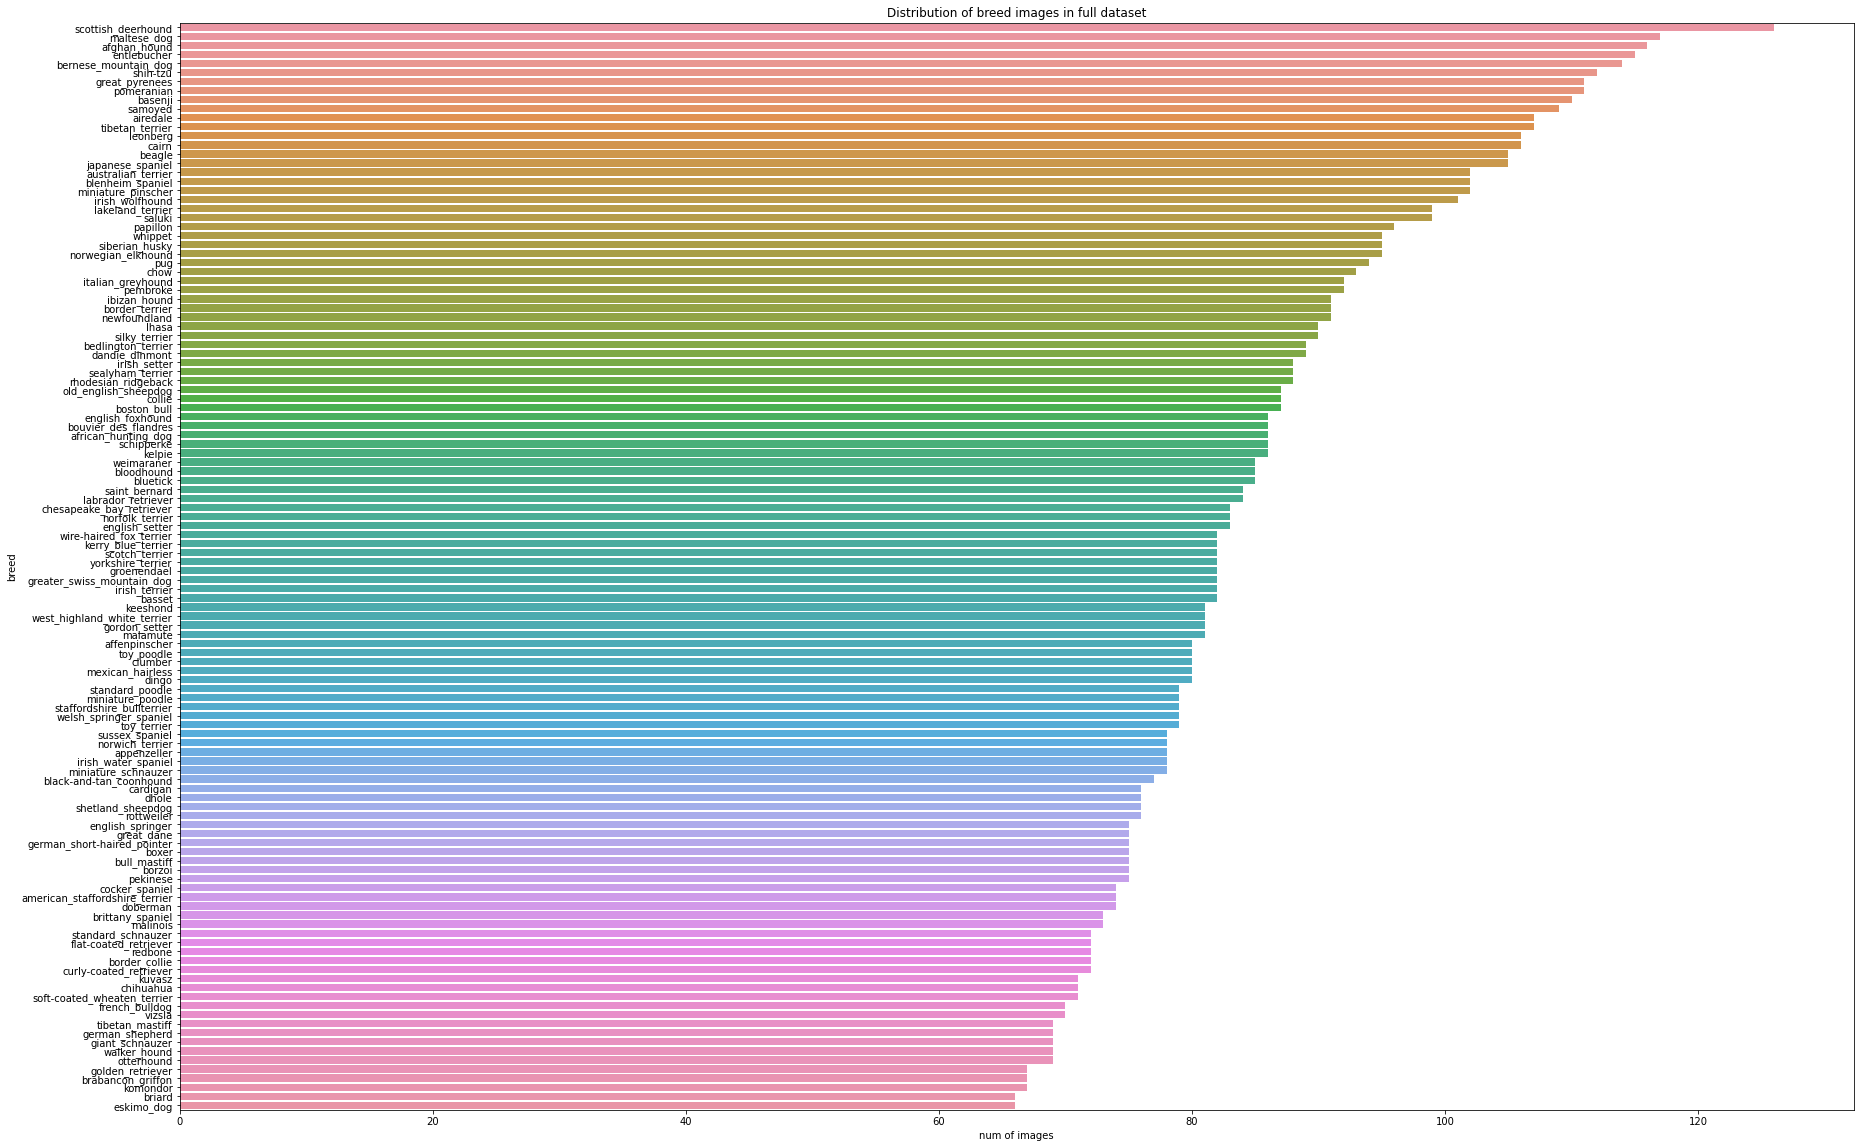

In [17]:
fig, axes = plt.subplots(figsize=(30, 20))
sns.barplot(y=breeds_df.index, x=breeds_df.num_of_images.values)
axes.set_xlabel("num of images")
axes.set_ylabel("breed")
axes.set_title("Distribution of breed images in full dataset")
plt.show()

### train-test split

In [8]:
np.random.seed(0)
random_indices = np.random.permutation(total_images)
train_ratio = 0.8
train_indices = random_indices[:int(train_ratio*total_images)]
test_indices = random_indices[int(train_ratio*total_images):]

In [10]:
train_labels = full_labels.iloc[train_indices]
test_labels = full_labels.iloc[test_indices]

In [14]:
print("Num of images in the train set: {}".format(len(train_labels)))
print("Num of images in the test set: {}".format(len(test_labels)))

Num of images in the train set: 8177
Num of images in the test set: 2045


**Check if all the breeds are represented well in both train and test sets**

In [16]:
train_breeds_df = train_labels.groupby(by="breed").count().sort_values(by=["id"], ascending=False)
train_breeds_df.columns = ['num_of_images']
print("-------Train set-------")
print("Total number of breeds: {}".format(len(train_breeds_df)))
print("Breed {} has maximum num of images which is equal to {}".format(train_breeds_df.iloc[0].name,train_breeds_df.num_of_images.values.max()))
print("Breed {} has least num of images which is equal to {}".format(train_breeds_df.iloc[-1].name,train_breeds_df.num_of_images.values.min()))

-------Train set-------
Total number of breeds: 120
Breed scottish_deerhound has maximum num of images which is equal to 101
Breed eskimo_dog has least num of images which is equal to 44


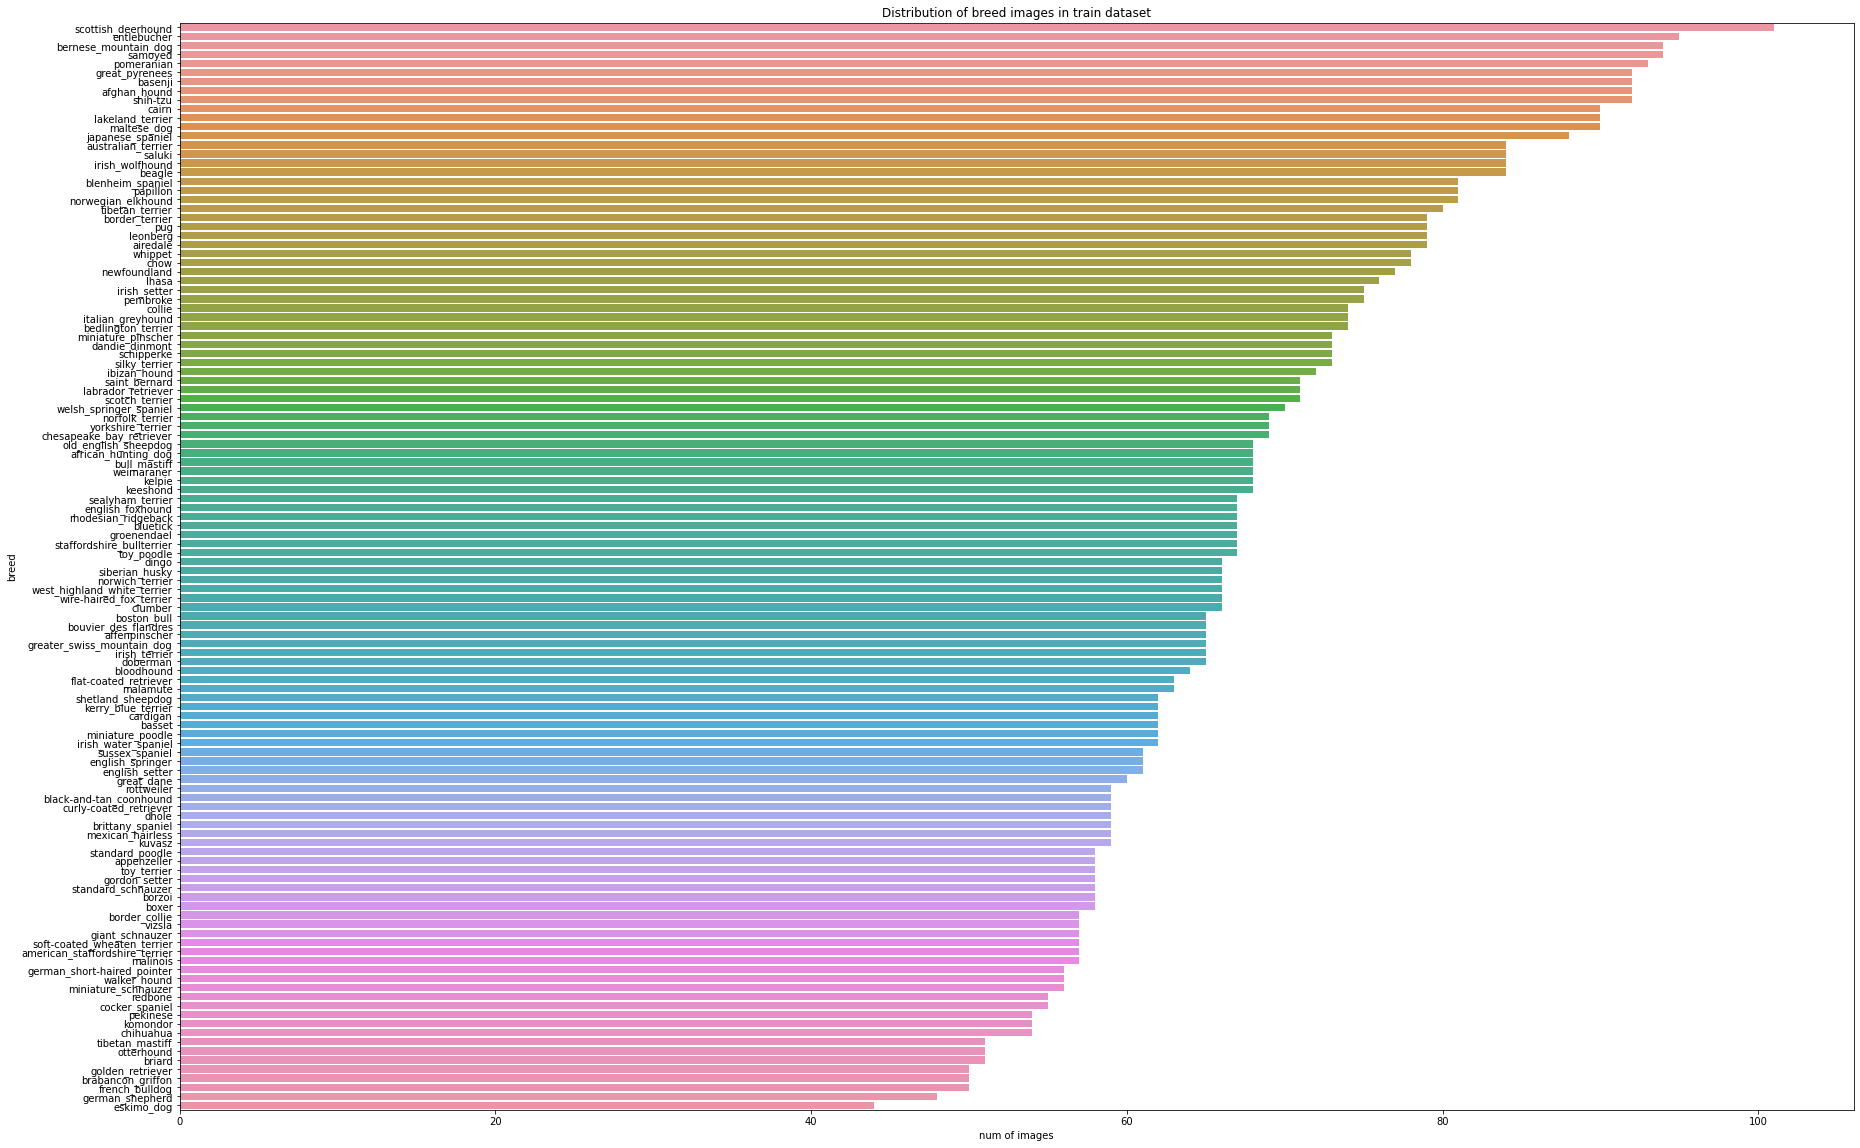

In [19]:
fig, axes = plt.subplots(figsize=(30, 20))
sns.barplot(y=train_breeds_df.index, x=train_breeds_df.num_of_images.values)
axes.set_title("Distribution of breed images in train dataset")
axes.set_xlabel("num of images")
axes.set_ylabel("breed")
plt.show()

In [21]:
test_breeds_df = test_labels.groupby(by="breed").count().sort_values(by=["id"], ascending=False)
test_breeds_df.columns = ['num_of_images']
print("-------Test set-------")
print("Total number of breeds: {}".format(len(test_breeds_df)))
print("Breed {} has maximum num of images which is equal to {}".format(test_breeds_df.iloc[0].name,test_breeds_df.num_of_images.values.max()))
print("Breed {} has least num of images which is equal to {}".format(test_breeds_df.iloc[-1].name,test_breeds_df.num_of_images.values.min()))

-------Test set-------
Total number of breeds: 120
Breed miniature_pinscher has maximum num of images which is equal to 29
Breed bull_mastiff has least num of images which is equal to 7


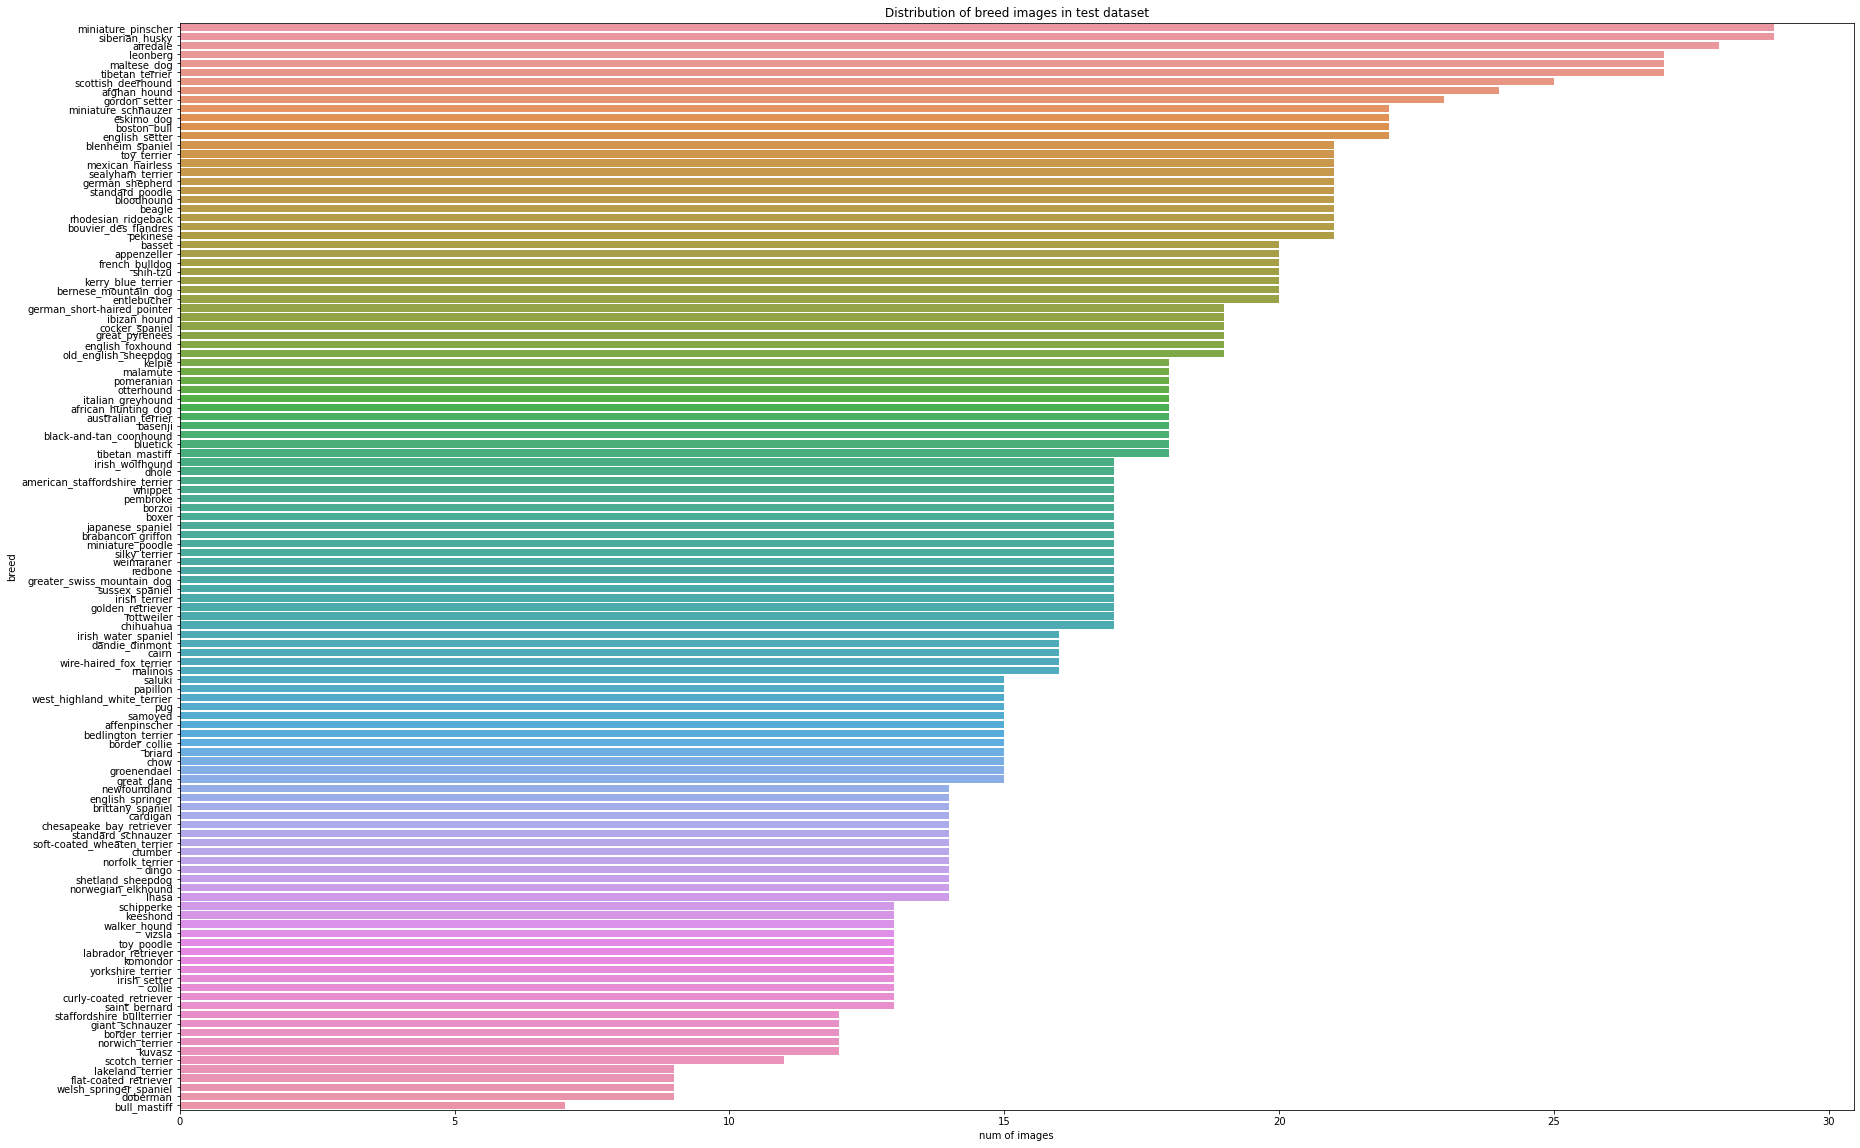

In [22]:
fig, axes = plt.subplots(figsize=(30, 20))
sns.barplot(y=test_breeds_df.index, x=test_breeds_df.num_of_images.values)
axes.set_title("Distribution of breed images in test dataset")
axes.set_xlabel("num of images")
axes.set_ylabel("breed")
plt.show()

**Both train and test set have all 120 breeds after the split.**  
**However the number of images per breed is randomly considered and not proportional to the number of images in the original distribution**

### Moving the images into train and test folder

In [27]:
train_images_file_list = train_labels.id.values.tolist()
test_images_file_list = test_labels.id.values.tolist()

In [30]:
def move_images(image_id_list, to_directory, src_directory):
    for image_id in image_id_list:
        file_name = image_id + ".jpg"
        src = os.path.join(src_directory, file_name)
        dest = os.path.join(to_directory, file_name)
        shutil.move(src, dest)

In [33]:
src_dir = "data/all"
train_dir = "data/train"
test_dir = "data/test"
move_images(train_images_file_list, train_dir, src_dir)
move_images(test_images_file_list, test_dir, src_dir)

In [34]:
train_labels.to_csv("data/train_lables.csv", index=False)

In [35]:
test_labels.to_csv("data/test_lables.csv", index=False)

In [12]:
breeds_df['class_id'] = range(len(breeds_df))
breeds_df['breed'] = breeds_df.index

In [17]:
breeds_class_map = breeds_df[['breed', 'class_id']].reset_index(drop=True)

In [19]:
breeds_class_map.to_csv("data/breeds_to_class_map.csv", index=False)